## A) Research Question
Can a regression model be constructed on the research dataset?
#### Capstone Project Name
Multiple Linear Regression analysis on Rideshare dataset
#### Context
The contribution of this study to the field of data analytics and the MSDA program is to create a
regression model to find statistical significance between the dependent variable and the independent variables.
This study will allow for a better understanding of the patterns of the lifestyle, rush hour, and commuting
practices (Chao, 2019). It will also provide better understanding of the prices Uber and Lyft charges and what
factors into the price of a ride. Does location, time, day, and weather affect price? Does these also have an
effect on the surcharges? The multiple linear regression method is to estimate the different variables that affect
the pricing of Uber and Lyft rides.
#### Hypothesis
    Null hypothesis-. a predictive multiple linear regression cannot be constructed from the dataset
    
    Alternate Hypothesis-. a predictive multiple linear regression can be constructed from the dataset
#### Project Outcomes
This project is to create a multiple linear regression to assess the association of multiple
independent variables and a single dependent variable (Multiple linear regression analysis 2013). Support for
the alternative hypothesis is found in Chao (2019), where a linear regression model was performed and found
that there was significance between the variables and price of fares.

### B) Data Collection
The dataset will be downloaded from kaggle.com which is available to the public as a csv file. Two files will be given: a file of the cab ride and a file of the weather. It will be cleaned and preprocessed in Python. Two datasets will be used for this study. The first dataset contains data about the cab rides of Uber and Lyft. These variables include distance, cab_type, timestamp, destination, source, price, surcharge_multiplier, id, product id, and name. This dataset also contains over 693,000 rows of data and composed 10 columns. The second dataset contains data about the weather which includes variables such as temp, location, clouds, pressure, rain, time_stamp, humidity, and wind. This dataset has over 6200 rows of data and composed of 8 columns. 

The data sparsity is about 7.95% for the cab ride dataset
The data sparsity is about 11% for the weather dataset

Both datasets will be merged during the preprocessing portion. In order to merge the two data sets the ‘time’ variable from the sets will be matched by the hour. Any values null in price will be dropped. The timestamp is in epoch format which will need to be converted to readable time data. ID and Product ID are not needed for this study and can be dropped. 

The advantage of using this dataset is that this dataset is made available to the public for other studies. The disadvantage of this dataset is the time frame of collecting data for this dataset was about a month and a half. 

The challenge faced on collecting this data was that this data used for the research question came in two files. The two files need to be merged into one file to properly utilize all the information for the study. 


### C) Data Extraction and Preparation
Python will be used due to the accessibility of the language; it can
work with large datasets and has a large library of packages that can run statistical analysis and data
analytics. It is a general-purpose programming language which means it can be used for numerous
applications. With Python compared to R, Python is the better option when it comes to how fast it runs in all
the environments than R (Python vs R: Know the difference 2022). When comparing Python to SAS, Python
is the better choice due to its accessibility. SAS is a commercial software program that needs to be
purchased while Python is an open-source programming language that is free to use (By admin, 2019).### C) Data Extraction and Preparation

Descriptive statistics will be utilized to have a general overview of the datasets. To check for normality, a scatter plot will be used to see the relationship between the independent
variables and the target variable. Univariate and multivariate techniques will be performed, and graphical
visualizations will be created for visual understanding of the datasets. A Q-Q plot can be used to check normal
distribution (Lani, 2021). Outliers and null values will be omitted. Once the preprocessing techniques have been
performed, a regression model can be performed to see the correlations of the variables. A linear regression
model will be used to see if the dependent variable price can be explained by the predictor variables
(Assumptions of linear regression 2022).

Python will be used due to the accessibility of the language; it can
work with large datasets and has a large library of packages that can run statistical analysis and data
analytics. It is a general-purpose programming language which means it can be used for numerous
applications. With Python compared to R, Python is the better option when it comes to how fast it runs in all
the environments than R (Python vs R: Know the difference 2022). When comparing Python to SAS, Python
is the better choice due to its accessibility. SAS is a commercial software program that needs to be
purchased while Python is an open-source programming language that is free to use (By admin, 2019).

The advantage of using Python is the speed when running on all environments compared to R environments.

The disadvantage of using Python versus R or SAS is the visual power and capability. R and SAS is capable of creating beautiful and appealing graphical displays as with Python can look a bit outdated.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pylab
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import logit
import statistics
from scipy import stats

import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('cab_rides.csv')
df1.dataframeName = 'cab_rides.csv'
df2 = pd.read_csv('weather.csv')
df2.dataframeName = 'weather.csv'

In [3]:
df1

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [4]:
df2

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
            plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


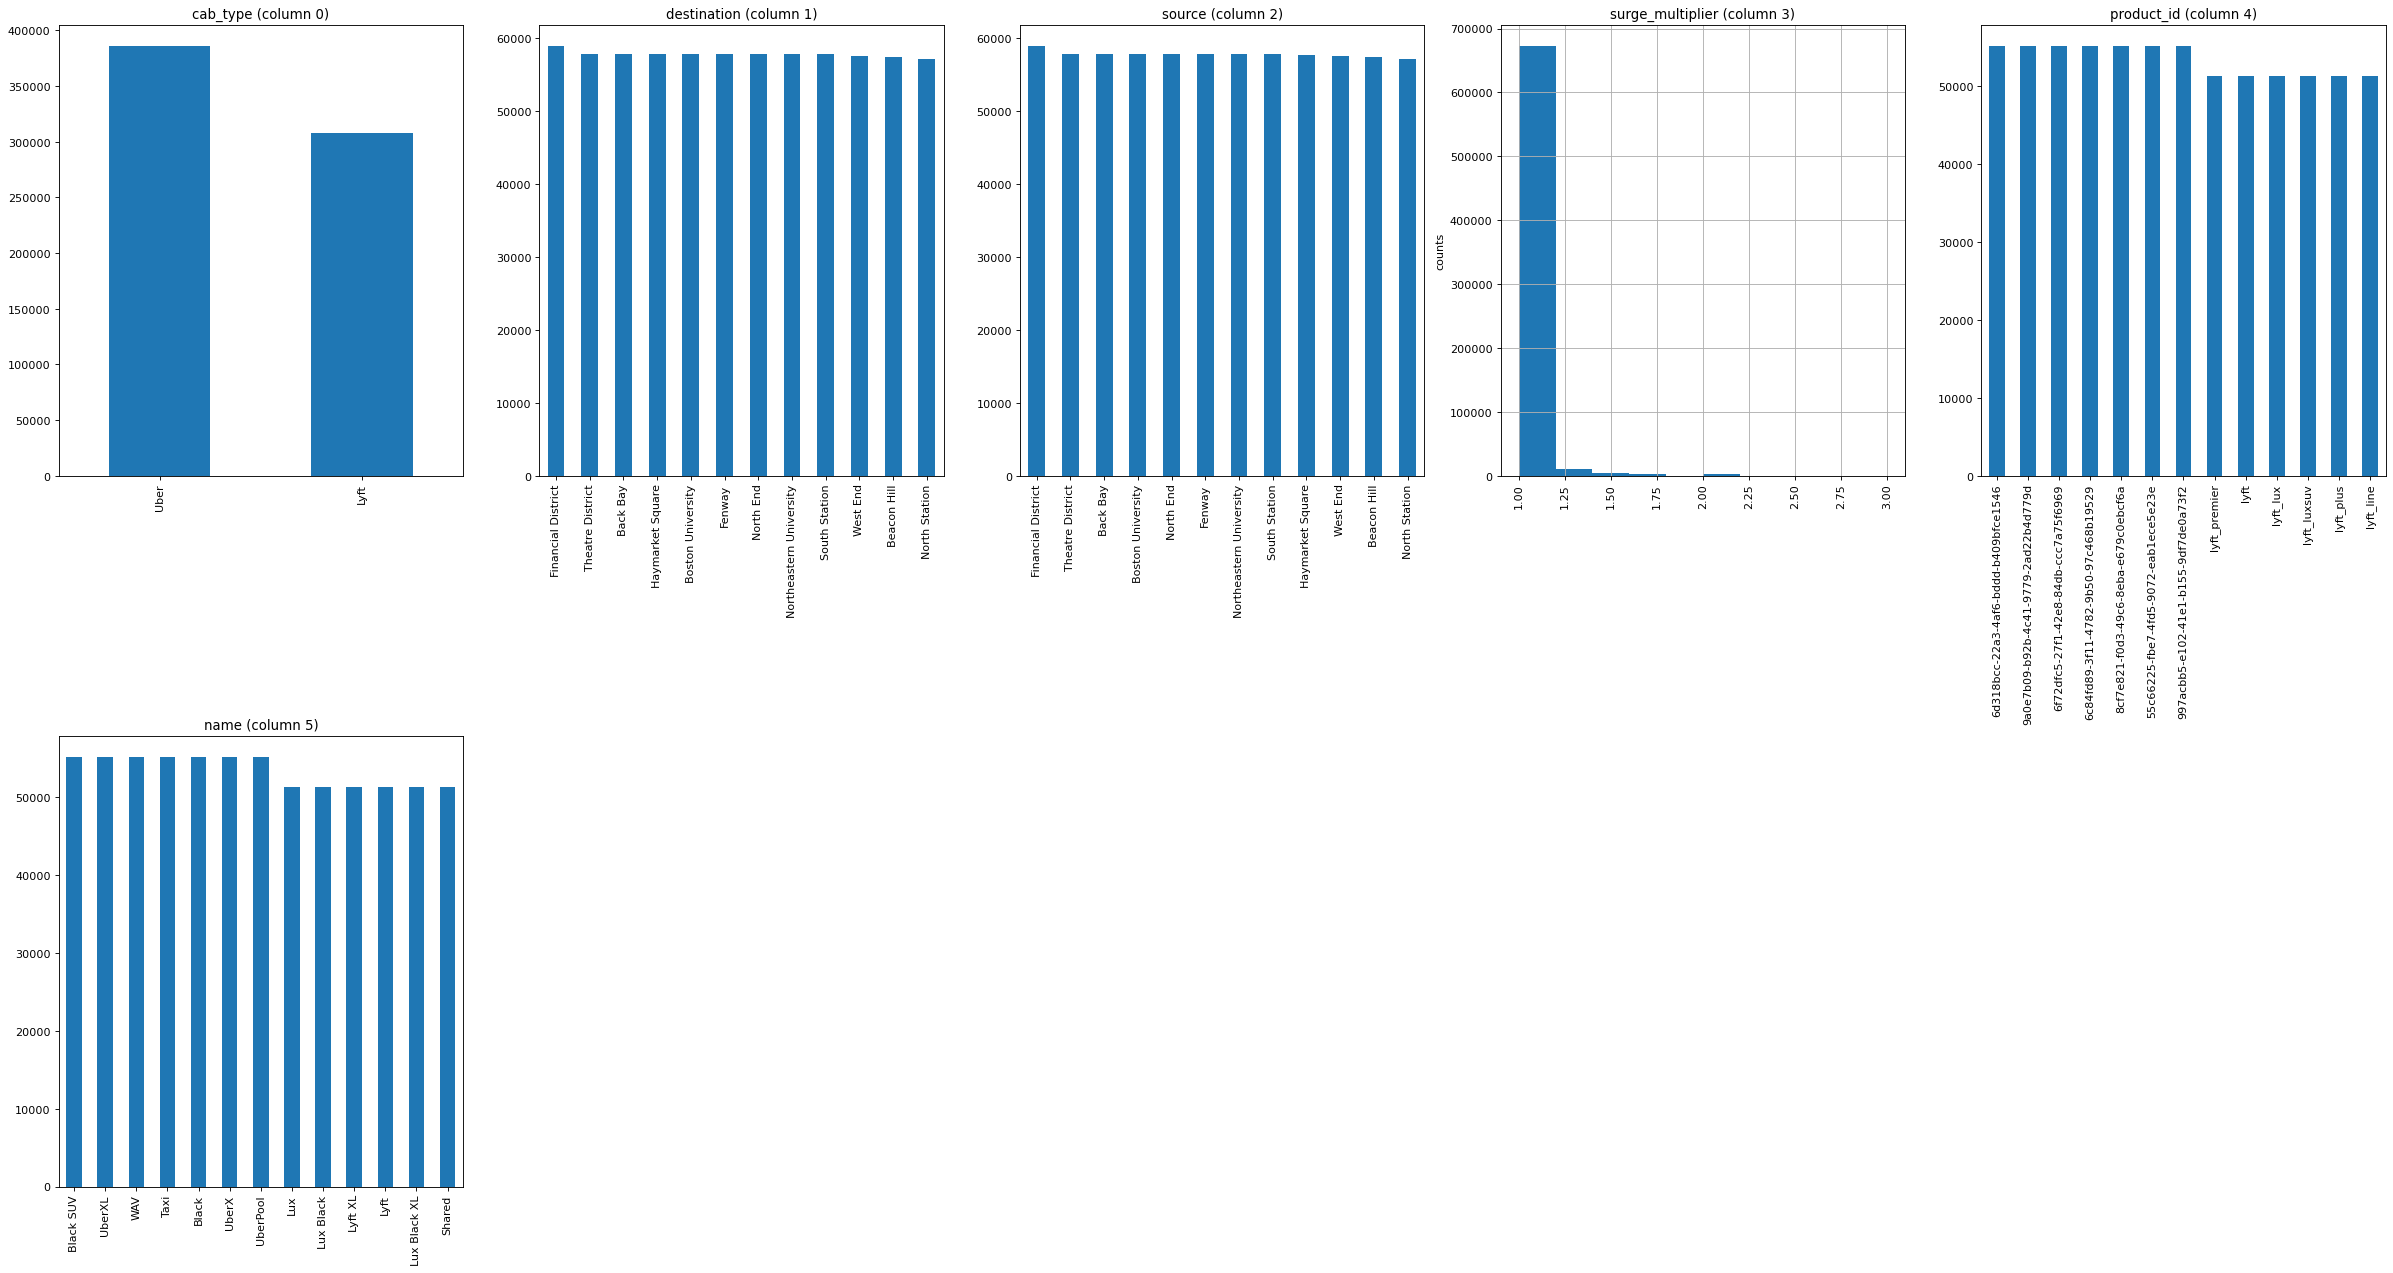

In [8]:
plotPerColumnDistribution(df1, 10, 5)

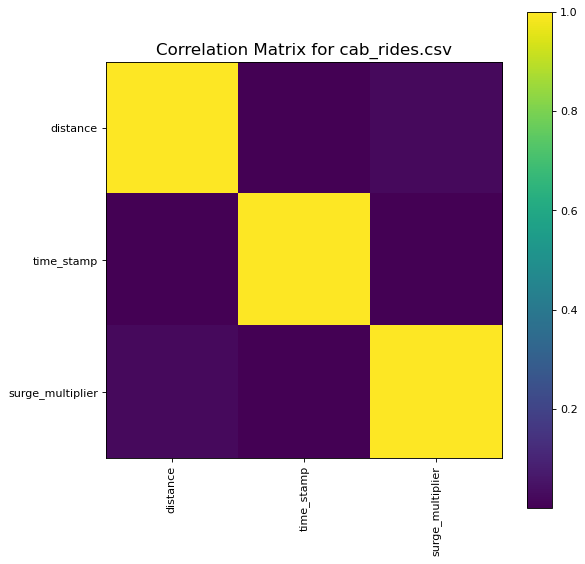

In [9]:
plotCorrelationMatrix(df1, 8)

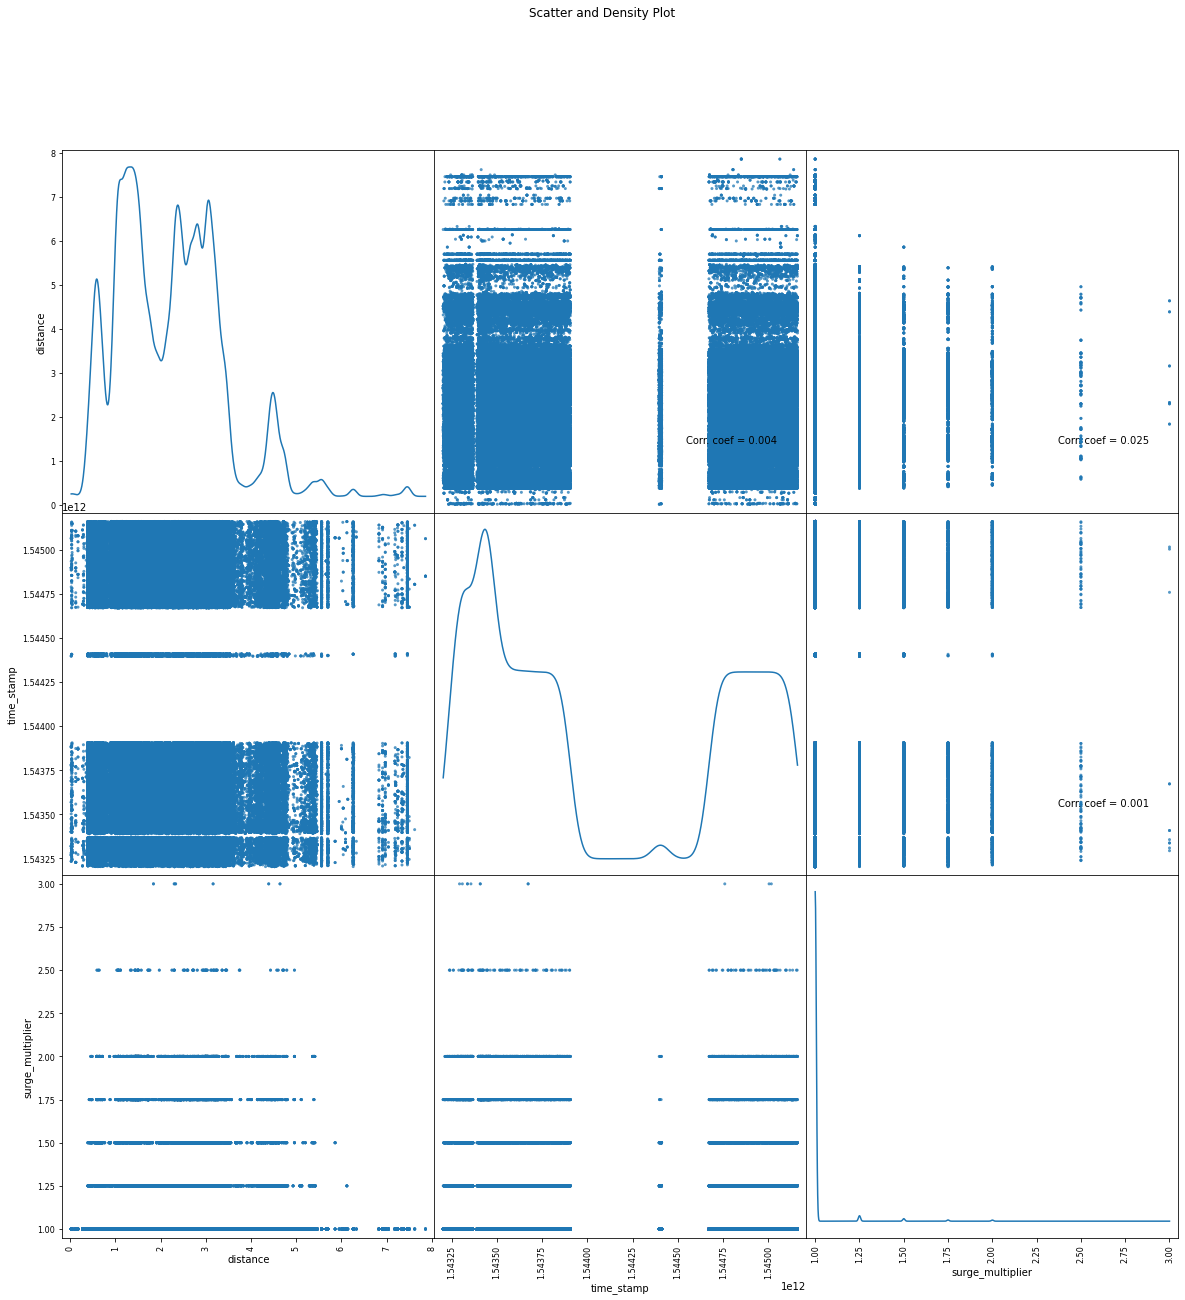

In [10]:
plotScatterMatrix(df1, 20, 10)

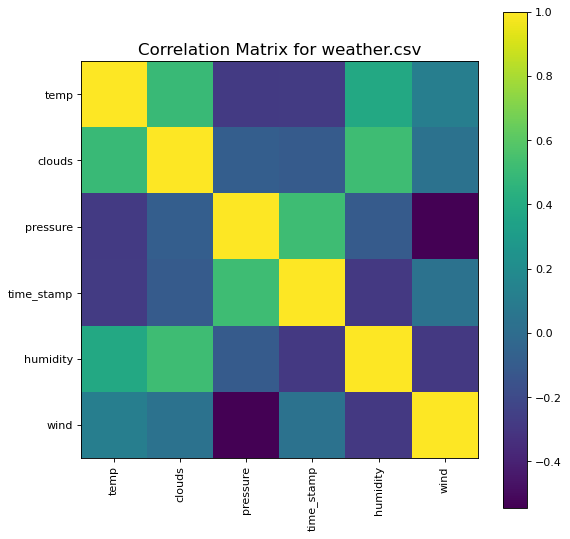

In [11]:
plotCorrelationMatrix(df2, 8)

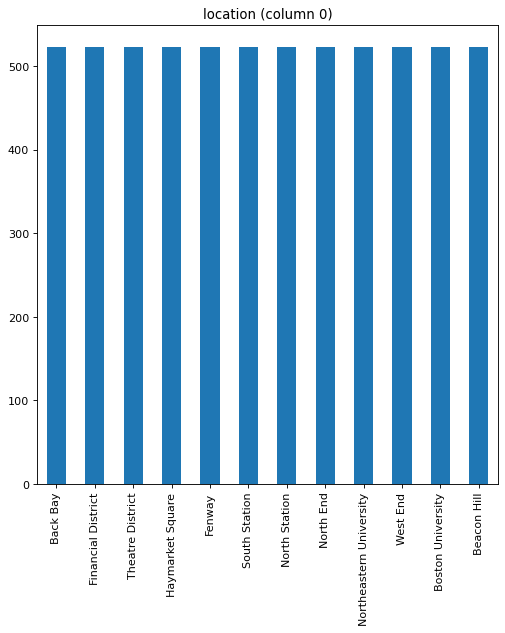

In [12]:
plotPerColumnDistribution(df2, 10, 5)

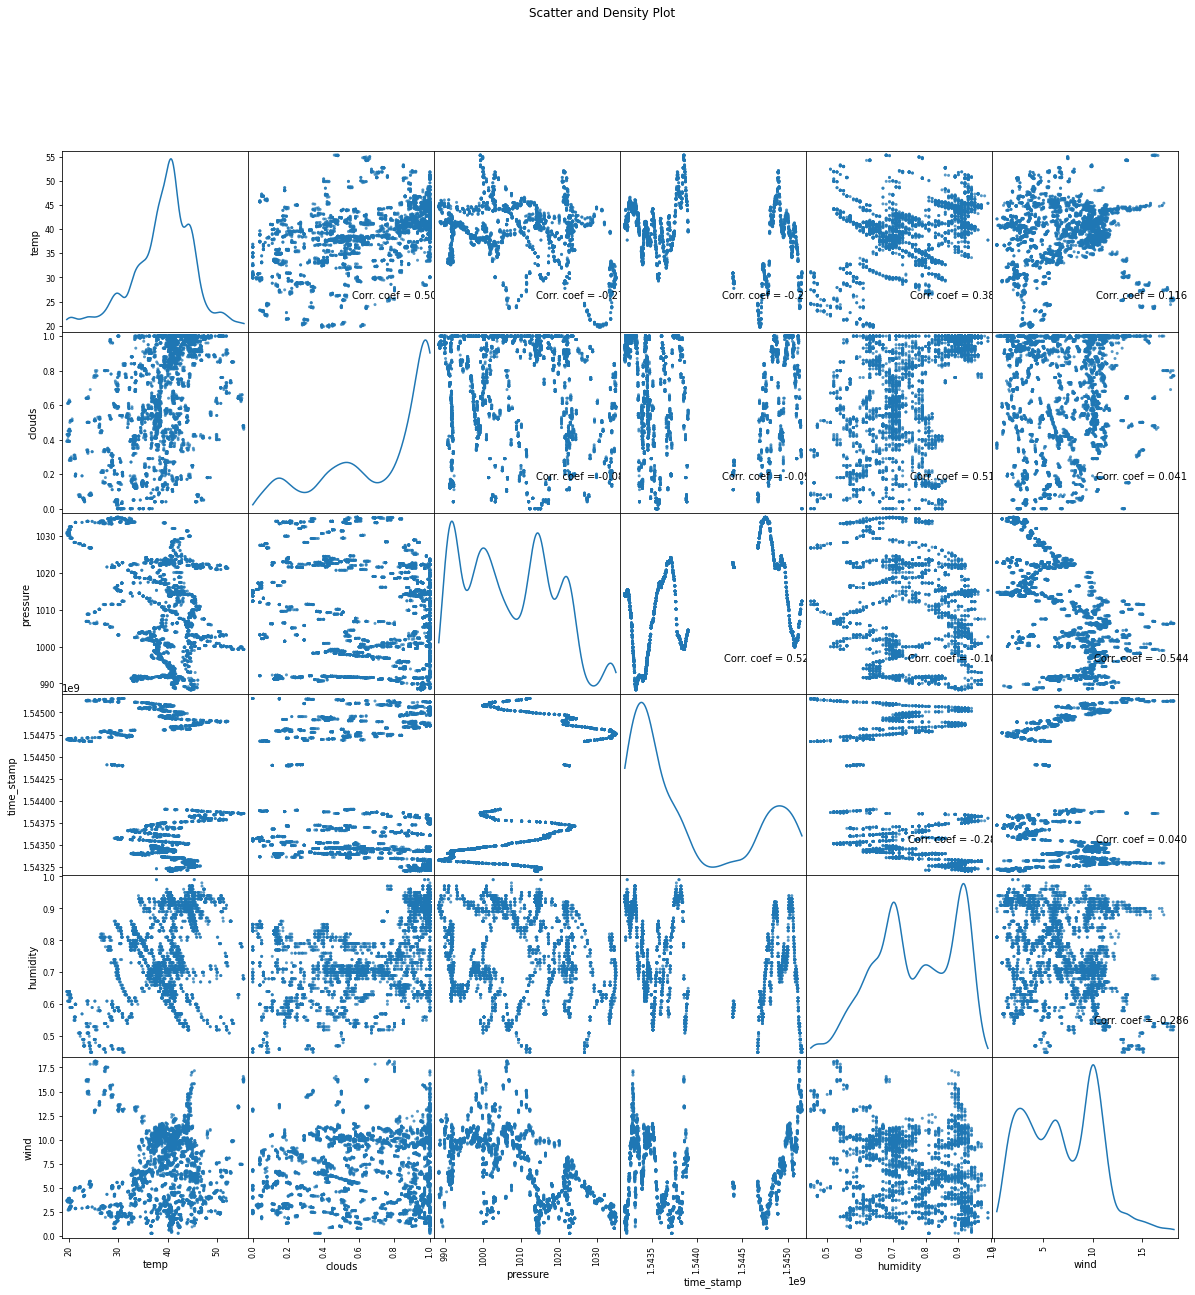

In [13]:
plotScatterMatrix(df2, 20, 10)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [15]:
df1.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [16]:
df1.dropna(axis=0, inplace = True)

In [17]:
df1.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [19]:
df2.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [20]:
df2.fillna(0, inplace = True)

In [21]:
df2.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64

In [29]:
df2 = df2.groupby('location').mean().reset_index()

In [30]:
df2

,location,temp,clouds,pressure,rain,time_stamp,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,1.543857e+09,0.755468,6.848948


df2.drop(columns = 'time_stamp', inplace = True)

In [31]:
df2_source = df2.rename(columns = (lambda x :x+'_source'))
df2_source.rename(columns = {'location_source':'source'}, inplace = True)
df2_source

,source,temp_source,clouds_source,pressure_source,rain_source,time_stamp_source,humidity_source,wind_source
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,1.543857e+09,0.755468,6.848948


In [32]:
df2_destination = df2.rename(columns = (lambda x :x+'_destination'))
df2_destination.rename(columns = {'location_destination':'destination'}, inplace = True)
df2_destination

,destination,temp_destination,clouds_destination,pressure_destination,rain_destination,time_stamp_destination,humidity_destination,wind_destination
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,1.543857e+09,0.755468,6.848948


In [36]:
df = df1\
        .merge(df2_source , on ='source')\
        .merge(df2_destination, on ='destination')
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp_source',
       'clouds_source', 'pressure_source', 'rain_source', 'time_stamp_source',
       'humidity_source', 'wind_source', 'temp_destination',
       'clouds_destination', 'pressure_destination', 'rain_destination',
       'time_stamp_destination', 'humidity_destination', 'wind_destination'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   distance                637976 non-null  float64
 1   cab_type                637976 non-null  object 
 2   time_stamp              637976 non-null  int64  
 3   destination             637976 non-null  object 
 4   source                  637976 non-null  object 
 5   price                   637976 non-null  float64
 6   surge_multiplier        637976 non-null  float64
 7   id                      637976 non-null  object 
 8   product_id              637976 non-null  object 
 9   name                    637976 non-null  object 
 10  temp_source             637976 non-null  float64
 11  clouds_source           637976 non-null  float64
 12  pressure_source         637976 non-null  float64
 13  rain_source             637976 non-null  float64
 14  time_stamp_source   

In [38]:
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,time_stamp_source,humidity_source,wind_source,temp_destination,clouds_destination,pressure_destination,rain_destination,time_stamp_destination,humidity_destination,wind_destination
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
637972,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
637973,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
637974,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   distance                637976 non-null  float64
 1   cab_type                637976 non-null  object 
 2   time_stamp              637976 non-null  int64  
 3   destination             637976 non-null  object 
 4   source                  637976 non-null  object 
 5   price                   637976 non-null  float64
 6   surge_multiplier        637976 non-null  float64
 7   id                      637976 non-null  object 
 8   product_id              637976 non-null  object 
 9   name                    637976 non-null  object 
 10  temp_source             637976 non-null  float64
 11  clouds_source           637976 non-null  float64
 12  pressure_source         637976 non-null  float64
 13  rain_source             637976 non-null  float64
 14  time_stamp_source   

In [40]:
df = df.drop('id', axis=1)

In [41]:
df['cab_type'] = df['cab_type'].replace({'Uber':0, 'Lyft':1})

In [42]:
df['cab_type'].value_counts()

0    330568
1    307408
Name: cab_type, dtype: int64

In [43]:
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,temp_source,...,time_stamp_source,humidity_source,wind_source,temp_destination,clouds_destination,pressure_destination,rain_destination,time_stamp_destination,humidity_destination,wind_destination
0,0.44,1,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,39.067897,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
1,0.44,1,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,39.067897,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
2,0.44,1,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,39.067897,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
3,0.44,1,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,39.067897,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
4,0.44,1,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,39.067897,...,1.543857e+09,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,1,1543218373178,Haymarket Square,Financial District,27.5,1.0,lyft_luxsuv,Lux Black XL,39.410822,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
637972,0.99,1,1543218373178,Haymarket Square,Financial District,5.0,1.0,lyft_line,Shared,39.410822,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
637973,0.99,1,1543465761522,Haymarket Square,Financial District,16.5,1.0,lyft_lux,Lux Black,39.410822,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
637974,0.99,1,1544762405152,Haymarket Square,Financial District,10.5,1.0,lyft_plus,Lyft XL,39.410822,...,1.543857e+09,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193


In [44]:
df=pd.get_dummies(df)

In [45]:
df

,distance,cab_type,time_stamp,price,surge_multiplier,temp_source,clouds_source,pressure_source,rain_source,time_stamp_source,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1,1544952607890,5.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,0,0,0,1,0,0,0,0
1,0.44,1,1543284023677,11.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,1,0,0,0,0,0,0,0,0,0
2,0.44,1,1543366822198,7.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,0,1,0,0,0,0,0,0
3,0.44,1,1543553582749,26.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,1,0,0,0,0,0,0,0
4,0.44,1,1543463360223,9.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,1,1543218373178,27.5,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,0,1,0,0,0,0,0,0,0
637972,0.99,1,1543218373178,5.0,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,0,0,0,0,1,0,0,0,0
637973,0.99,1,1543465761522,16.5,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,1,0,0,0,0,0,0,0,0
637974,0.99,1,1544762405152,10.5,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,0,0,0,1,0,0,0,0,0


In [47]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'price', 'surge_multiplier',
       'temp_source', 'clouds_source', 'pressure_source', 'rain_source',
       'time_stamp_source', 'humidity_source', 'wind_source',
       'temp_destination', 'clouds_destination', 'pressure_destination',
       'rain_destination', 'time_stamp_destination', 'humidity_destination',
       'wind_destination', 'destination_Back Bay', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northea

In [51]:
df.describe()

,distance,cab_type,time_stamp,price,surge_multiplier,temp_source,clouds_source,pressure_source,rain_source,time_stamp_source,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
count,637976.000000,637976.000000,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,...,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,2.189261,0.481849,1.544046e+12,16.545125,1.015068,39.091088,0.677776,1008.445196,0.008212,1.543857e+09,...,0.080309,0.080309,0.080309,0.080309,0.080309,0.080306,0.086353,0.086357,0.086361,0.086361
std,1.135413,0.499671,6.892028e+08,9.324359,0.095422,0.145908,0.000980,0.006164,0.000478,5.809926e-02,...,0.271771,0.271771,0.271771,0.271771,0.271771,0.271766,0.280884,0.280891,0.280896,0.280896
min,0.020000,0.000000,1.543204e+12,2.500000,1.000000,38.964379,0.676711,1008.435793,0.007343,1.543857e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.270000,0.000000,1.543444e+12,9.000000,1.000000,38.986711,0.676730,1008.441090,0.007738,1.543857e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.160000,0.000000,1.543737e+12,13.500000,1.000000,39.047744,0.677495,1008.444168,0.008405,1.543857e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.930000,1.000000,1.544828e+12,22.500000,1.000000,39.090841,0.678432,1008.447820,0.008644,1.543857e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.860000,1.000000,1.545161e+12,97.500000,3.000000,39.410822,0.679866,1008.459254,0.008660,1.543857e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
import datetime

In [61]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'],unit= 'ms')

In [62]:
df

,distance,cab_type,time_stamp,price,surge_multiplier,temp_source,clouds_source,pressure_source,rain_source,time_stamp_source,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1,2018-12-16 09:30:07.890,5.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,0,0,0,1,0,0,0,0
1,0.44,1,2018-11-27 02:00:23.677,11.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,1,0,0,0,0,0,0,0,0,0
2,0.44,1,2018-11-28 01:00:22.198,7.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,0,1,0,0,0,0,0,0
3,0.44,1,2018-11-30 04:53:02.749,26.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,1,0,0,0,0,0,0,0
4,0.44,1,2018-11-29 03:49:20.223,9.0,1.0,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,1,2018-11-26 07:46:13.178,27.5,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,0,1,0,0,0,0,0,0,0
637972,0.99,1,2018-11-26 07:46:13.178,5.0,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,0,0,0,0,1,0,0,0,0
637973,0.99,1,2018-11-29 04:29:21.522,16.5,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,1,0,0,0,0,0,0,0,0
637974,0.99,1,2018-12-14 04:40:05.152,10.5,1.0,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,...,0,0,0,0,1,0,0,0,0,0


## F) Acknowledge sources
- Assumptions of linear regression. Statistics Solutions. (2022, July 
7). Retrieved July 23, 2022, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
- Boston University School of Public Health. (2013, January 17). Multiple linear regression analysis. Retrieved July 27, 2022, from https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_multivariable/bs704_multivariable7.html
- By admin (Ed.). (2019, August 22). SAS vs python: 7 best differences you should know. CourseMentor. Retrieved July 26, 2022, from https://coursementor.com/blog/sas-vs-python/
- Chao, Junzhi. (2019). Modeling and Analysis of Uber’s Rider Pricing. https://www.researchgate.net/publication/338438722_Modeling_and_Analysis_of_Uber's_Rider_Pricing
- Lani, J. (2021, August 11). Assumptions of multiple linear regression. Statistics Solutions. Retrieved July 27, 2022, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/#:~:text=Multivariate%20Normality%E2%80%93Multiple%20regression%20assumes,Inflation%20Factor%20(VIF)%20values.
- Python vs R: Know the difference. InterviewBit. (2022, June 23). Retrieved July 26, 2022, from https://www.interviewbit.com/blog/python-vs-r/
- Terra, J. (2021, July 22). Python for data science and data analysis. Simplilearn.com. Retrieved July 16, 2022, from https://www.simplilearn.com/why-python-is-essential-for-data-analysis-article#:~:text=Thanks%20to%20Python&#39;s%20focus%20on,needs%20when%20using%20older%20languages.